# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## Cleaning data

- IDENTIFY ANY NULL DATA

In [2]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [3]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [4]:
df_flights[df_flights.isnull().any(axis = 1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [5]:
df_flights = df_flights.dropna(axis=0, how='any')

- IDENTIFY AND ELIMINATE OUTLIERS

In [6]:
# Solo columnas numéricas
df_num = df_flights.select_dtypes(include='number')

print(df_num.head())
df_num.describe()


   Year  Month  DayofMonth  DayOfWeek  OriginAirportID  DestAirportID  \
0  2013      9          16          1            15304          12478   
1  2013      9          23          1            14122          13232   
2  2013      9           7          6            14747          11278   
3  2013      7          22          1            13930          11042   
4  2013      5          16          4            13931          10397   

   CRSDepTime  DepDelay  DepDel15  CRSArrTime  ArrDelay  ArrDel15  Cancelled  
0        1539         4       0.0        1824        13         0          0  
1         710         3       0.0         740        22         1          0  
2         810        -3       0.0        1614        -7         0          0  
3         804        35       1.0        1027        33         1          0  
4         545        -1       0.0         728        -9         0          0  


,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,269179.0,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000
mean,2013.0,6.983877,15.817259,3.902336,12744.767642,12739.446093,1324.412933,10.456614,0.201134,1504.637338,6.563287,0.207888,0.000576
std,0.0,1.983873,8.805963,1.989296,1501.949045,1503.506863,470.760511,35.840715,0.400849,493.215438,38.420207,0.405797,0.023989
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1319.000000,-1.000000,0.000000,1527.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1722.000000,9.000000,0.000000,1917.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


Min: -75, Max: 1440, Mean: 6.563286883449304, Median: -3.0, Mode: -7


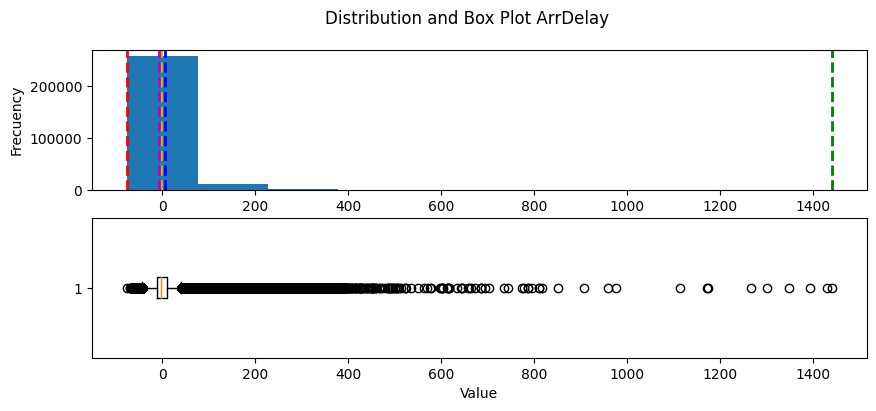

Min: -63, Max: 1425, Mean: 10.456614371849216, Median: -1.0, Mode: -3


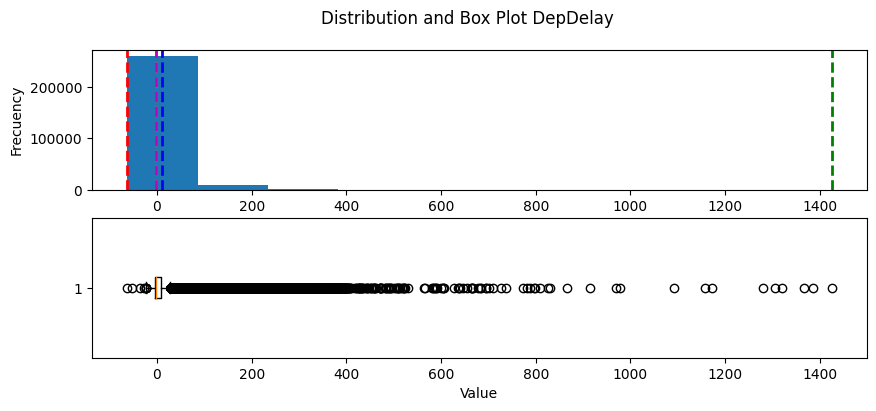

In [7]:
from matplotlib import pyplot as plt

def show_distribution_and_box_plot (var_data, name:str):
    from matplotlib import pyplot as plt

    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    print(f"Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Median: {med_val}, Mode: {mod_val}")

    fig, ax = plt.subplots(2, 1, figsize=(10, 4))

    ax[0].hist(var_data)
    ax[0].set_ylabel('Frecuency')

    ax[0].axvline(min_val, color='r', linestyle='dashed', linewidth=2, label='Min')
    ax[0].axvline(max_val, color='g', linestyle='dashed', linewidth=2, label='Max')
    ax[0].axvline(mean_val, color='b', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(med_val, color='y', linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(mod_val, color='m', linestyle='dashed', linewidth=2, label='Mode')
    
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    fig.suptitle('Distribution and Box Plot {name}'.format(name=name))
    plt.show()

show_distribution_and_box_plot(df_flights["ArrDelay"], "ArrDelay")
show_distribution_and_box_plot(df_flights["DepDelay"], "DepDelay")


In [8]:
Q1 = df_flights["ArrDelay"].quantile(0.25)
Q3 = df_flights["ArrDelay"].quantile(0.75)
IQR = Q3 - Q1

outliers = df_flights[(df_flights["ArrDelay"] < Q1 - 1.5*IQR) | (df_flights["ArrDelay"] > Q3 + 1.5*IQR)]
porcentaje_outliers = len(outliers) / len(df_flights) * 100
print(f"Outliers ArrDelay: {len(outliers)} ({porcentaje_outliers:.2f}%)")


Outliers ArrDelay: 25319 (9.41%)


Q1: -11.0, Q3: 10.0, IQR: 21.0
Original: 269179 registros
Sin outliers: 243860 registros
Eliminados: 25319 (9.41%)
Min: -42, Max: 41, Mean: -2.588723037808579, Median: -5.0, Mode: -7


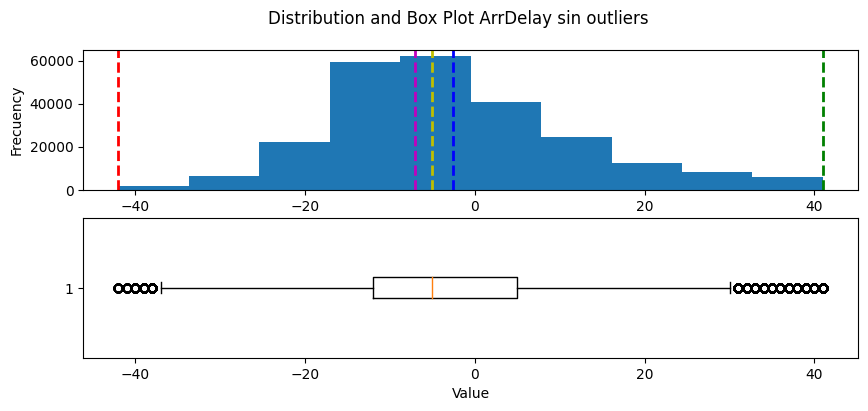

In [9]:
# 1️⃣ Calcular los cuartiles y el IQR
Q1 = df_flights["ArrDelay"].quantile(0.25)
Q3 = df_flights["ArrDelay"].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# 2️⃣ Definir los límites "aceptables"
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# 3️⃣ Filtrar los datos que están dentro del rango (sin outliers)
df_no_outliers = df_flights[
    (df_flights["ArrDelay"] >= lower_limit) &
    (df_flights["ArrDelay"] <= upper_limit)
]

# 4️⃣ (Opcional) Ver cuántos se eliminaron
print(f"Original: {len(df_flights)} registros")
print(f"Sin outliers: {len(df_no_outliers)} registros")
print(f"Eliminados: {len(df_flights) - len(df_no_outliers)} ({(1 - len(df_no_outliers)/len(df_flights))*100:.2f}%)")

df_flights = df_no_outliers.copy()

show_distribution_and_box_plot(df_flights["ArrDelay"], "ArrDelay sin outliers")


In [10]:
Q1 = df_flights["DepDelay"].quantile(0.25)
Q3 = df_flights["DepDelay"].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")


outliers_DepDelay = df_flights[(df_flights["DepDelay"] < Q1 - 1.5*IQR) | (df_flights["DepDelay"] > Q3 + 1.5*IQR)]
porcentaje_outliers_DepDelay = len(outliers_DepDelay) / len(df_flights) * 100
print(f"Outliers DepDelay: {len(outliers_DepDelay)} ({porcentaje_outliers_DepDelay:.2f}%)")

Q1: -5.0, Q3: 5.0, IQR: 10.0
Outliers DepDelay: 20341 (8.34%)


Q1: -5.0, Q3: 5.0, IQR: 10.0
Original: 243860 registros
Sin outliers: 223519 registros
Eliminados: 20341 (8.34%)
Min: -20, Max: 20, Mean: -0.5554829790756043, Median: -2.0, Mode: -3


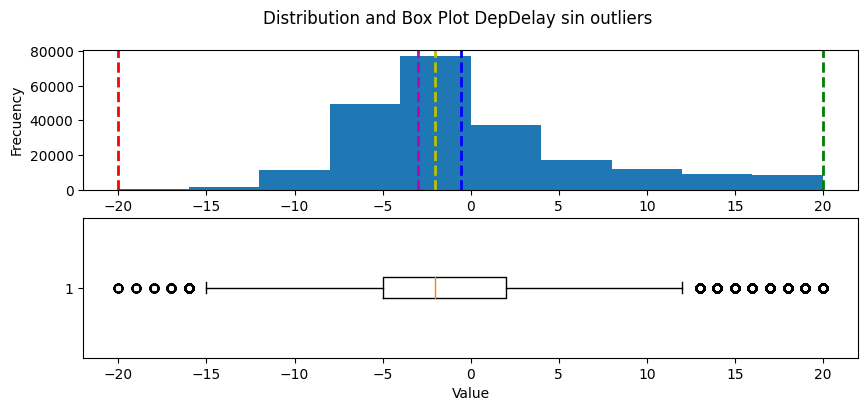

In [11]:
# 1️⃣ Calcular los cuartiles y el IQR
Q1 = df_flights["DepDelay"].quantile(0.25)
Q3 = df_flights["DepDelay"].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# 2️⃣ Definir los límites "aceptables"
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# 3️⃣ Filtrar los datos que están dentro del rango (sin outliers)
df_no_outliers_DepDelay = df_flights[
    (df_flights["DepDelay"] >= lower_limit) &
    (df_flights["DepDelay"] <= upper_limit)
]

# 4️⃣ (Opcional) Ver cuántos se eliminaron
print(f"Original: {len(df_flights)} registros")
print(f"Sin outliers: {len(df_no_outliers_DepDelay)} registros")
print(f"Eliminados: {len(df_flights) - len(df_no_outliers_DepDelay)} ({(1 - len(df_no_outliers_DepDelay)/len(df_flights))*100:.2f}%)")

df_flights = df_no_outliers_DepDelay.copy()

show_distribution_and_box_plot(df_flights["DepDelay"], "DepDelay sin outliers")

In [12]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,223519.0,223519.000000,223519.000000,223519.000000,223519.000000,223519.000000,223519.000000,223519.000000,223519.000000,223519.000000,223519.000000,223519.000000,223519.000000
mean,2013.0,7.028279,15.794738,3.907632,12757.512592,12732.685056,1283.673057,-0.555483,0.046470,1466.859054,-4.923340,0.067520,0.000367
std,0.0,2.007852,8.868001,2.000455,1509.042747,1505.998403,469.969243,6.663455,0.210502,487.003134,12.382222,0.250921,0.019150
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-20.000000,0.000000,1.000000,-42.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,852.000000,-5.000000,0.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-2.000000,0.000000,1450.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,24.000000,6.000000,14100.000000,14057.000000,1657.000000,2.000000,0.000000,1850.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,20.000000,1.000000,2359.000000,41.000000,1.000000,1.000000


## Explore the cleaned data.